In [50]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import HTML
import numpy as np

In [51]:
# TODO filter out charged + inorganic + metals
file = 'preprocessed_data.sdf'
file = '../data/qspr-dataset-02.sdf'

preprocessed = PandasTools.LoadSDF(file,smilesName='SMILES',molColName='Molecule',includeFingerprints=True)


RDKit WARNING: [15:21:31] Warning: molecule is tagged as 3D, but all Z coords are zero


,pLC50,ID,SMILES,Molecule
0,2.504,Row0,c1cc[nH]c1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
1,4.818,Row1,CCCCCCCCCCO,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
2,0.842,Row2,CC(C)O,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
3,4.228,Row3,O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
4,3.7,Row4,CCCC(C)C1(CC)C(=O)NC(=O)N([Na])C1=O,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
...,...,...,...,...
347,2.115,Row347,Cc1nnc(N)nc1C,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
348,2.394,Row348,Cc1nc(C)c(C)o1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
349,3.334,Row349,NC(=O)c1cccc(Br)c1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
350,4.064,Row350,CC(C)c1cccc(C(C)C)c1N,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

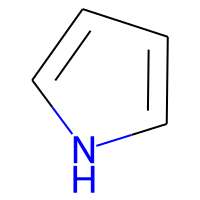
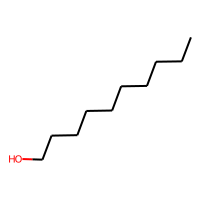
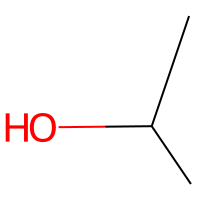
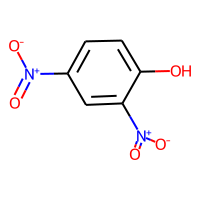
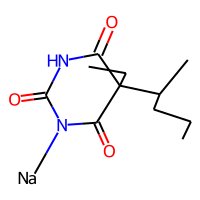
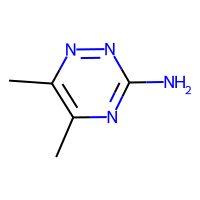
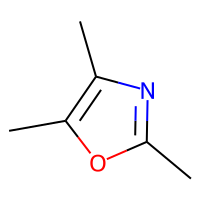
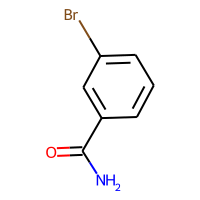
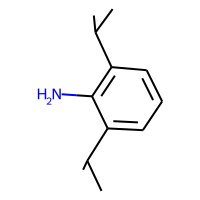
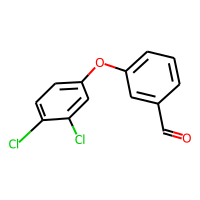

In [52]:
preprocessed

In [69]:

def is_organic(smile):
    """
    Function that tests if a smile is organic or not
    """
    organic_numbers = set([5, 6, 7, 8, 9, 15, 16, 17, 35, 53])
    
    # get molecule from smiles
    mol = Chem.MolFromSmiles(smile)
    # get set of atomic number of molecule
    atomic_num = set([atom.GetAtomicNum() for atom in mol.GetAtoms()])
        
    # check if all atomic numbers is subset of organic
    organic_mol = (atomic_num <= organic_numbers)

    if organic_mol:
        return True
    else:
        return False

In [55]:
# filter out inorganic molecules
# organic =['H','C','N','Br','O','I','Cl','F','S','P']

organic = preprocessed['SMILES'].apply(is_organic)

# remove inorganic molecule
#preprocessed.drop(preprocessed[-organic].index)

#rdkit.Chem.PandasTools.WriteSDF(preprocessed, out="prep_data_organic.sdf", molColName="Molecule")


In [14]:
# check for non neutral molecules 
preprocessed['Charge'] = preprocessed['Molecule'].apply(lambda x: Chem.GetFormalCharge(x))
print('Nr of molecules with a charge: {}'.format(np.sum(preprocessed['Charge'] > 0)))

Nr of molecules with a charge: 0


In [57]:
# check for unique molecules:
unique,counts = np.unique(preprocessed['SMILES'].values, return_counts=True)
d = dict(zip(unique,counts))

nr_duplicate = np.sum(counts)-len(unique)
print('Nr of molecules repeated in dataset {}'.format(nr_duplicate))

# if duplicates are contained in data:
if nr_duplicate > 0:
    print('Nr of molecules dataset {}'.format(preprocessed.shape[0]))
    preprocessed = preprocessed.drop_duplicates(subset=['SMILES'])
    print('Nr of molecules after removing duplicates {}'.format(preprocessed.shape[0]))
        
    


Nr of molecules repeated in dataset 3


(array([ 59, 115, 338]),)

In [59]:
np.where(preprocessed['SMILES'] == unique[338])

(array([ 0, 93]),)

,pLC50,ID,SMILES,Molecule
2,0.842,Row2,CC(C)O,
257,0.842,Row257,CC(C)O,

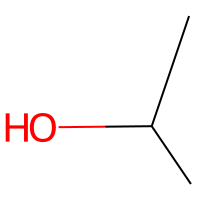
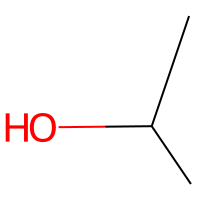

In [49]:
HTML(preprocessed.iloc[[2,257]].to_html())

In [64]:
print(preprocessed.shape)
preprocessed = preprocessed.drop_duplicates(subset=['SMILES'])
print(preprocessed.shape)

(352, 4)
(349, 4)


,pLC50,ID,SMILES,Molecule
2,0.842,Row2,CC(C)O,
260,3.115,Row260,CC=O,

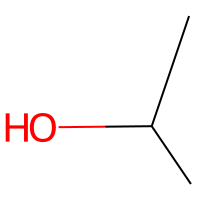
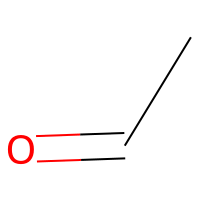

In [68]:
HTML(preprocessed.iloc[[2,257]].to_html())